# Actividad final: Clasificación de imágenes satelitales con CNNs

In [32]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

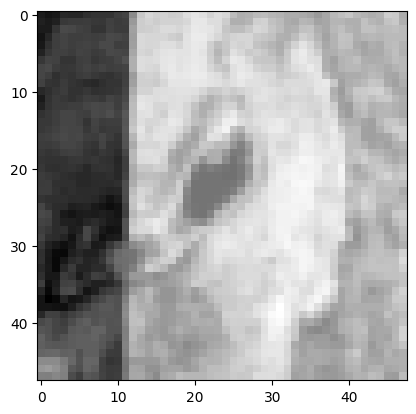

In [33]:
# Load data
inputFile = open('../data/raw/biomas.obj', 'rb')
data = pickle.load(inputFile)

processed_images = data['Images']
labels = data['Labels']

# Plot one image
plt.imshow(processed_images[200], cmap='gray')
plt.show()

In [46]:
# Data preparation for CNN
x = np.array(processed_images)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
x = x/255

y = np.array(labels, dtype = int)
yc = to_categorical(y)

input_shape = (x.shape[1], x.shape[2], 1)

num_classes = yc.shape[1]

x.shape


(2016, 48, 48, 1)

In [35]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, yc, test_size=0.2, random_state=42)


# CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.1827 - loss: 1.9059 - val_accuracy: 0.3193 - val_loss: 1.7087
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3200 - loss: 1.6366 - val_accuracy: 0.5198 - val_loss: 1.3050
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3772 - loss: 1.4215 - val_accuracy: 0.5099 - val_loss: 1.2467
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4352 - loss: 1.3317 - val_accuracy: 0.5718 - val_loss: 1.1654
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.4778 - loss: 1.2528 - val_accuracy: 0.5619 - val_loss: 1.1147
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5282 - loss: 1.1760 - val_accuracy: 0.6460 - val_loss: 1.0305
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5647 - loss: 1.1275 - val_accuracy: 0.6337 - val_loss: 0.9919
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5691 - loss: 1.0668 - val_accuracy: 0.6312 -

In [42]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(np.argmax(y_test, axis=-1), y_pred))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.85      0.66      0.74        68
           1       0.65      0.88      0.75        68
           2       0.53      0.51      0.52        61
           3       0.61      0.43      0.51        76
           4       0.73      0.88      0.80        68
           5       0.51      0.52      0.52        63

    accuracy                           0.65       404
   macro avg       0.65      0.65      0.64       404
weighted avg       0.65      0.65      0.64       404



In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [44]:
# DEFINIMOS CROSS VALIDATION
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, test_index in kf.split(processed_images):
    x_train, x_test = processed_images[train_index], processed_images[test_index]
    y_train, y_test = labels_categorical[train_index], labels_categorical[test_index]

    model = create_model()

    # DEFINIMOS EL MODELO
    model.fit(x_train, y_train, epochs=80, batch_size=128, verbose=1)

    y_pred = np.argmax(model.predict(x_test), axis=-1)
    y_test_labels = np.argmax(y_test, axis=-1)

    accuracy = accuracy_score(y_test_labels, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Exactitud del pliegue: {accuracy}")
    print(classification_report(y_test_labels, y_pred, target_names=[str(i) for i in range(num_classes)]))

print(f"Exactitud promedio con CV: {np.mean(fold_accuracies)}")

Epoch 1/50


c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.1743 - loss: 1.8413 - val_accuracy: 0.1658 - val_loss: 1.7224
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.2013 - loss: 1.7031 - val_accuracy: 0.3837 - val_loss: 1.5388
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.3293 - loss: 1.5207 - val_accuracy: 0.4653 - val_loss: 1.2928
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4046 - loss: 1.3818 - val_accuracy: 0.5173 - val_loss: 1.2217
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4375 - loss: 1.3039 - val_accuracy: 0.5297 - val_loss: 1.1267
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.4972 - loss: 1.2297 - val_accuracy: 0.5520 - val_loss: 1.0510
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5342 - loss: 1.1525 - val_accuracy: 0.5916 - val_loss: 1.0062
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5803 - loss: 1.1185 - val_accuracy: 0.5891 - val_loss: 0.

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.1845 - loss: 1.7836 - val_accuracy: 0.2804 - val_loss: 1.6056
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.3579 - loss: 1.5400 - val_accuracy: 0.4938 - val_loss: 1.3613
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.4268 - loss: 1.3477 - val_accuracy: 0.5533 - val_loss: 1.2243
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.4693 - loss: 1.2422 - val_accuracy: 0.5682 - val_loss: 1.1574
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.5338 - loss: 1.1581 - val_accuracy: 0.6179 - val_loss: 1.0372
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.6008 - loss: 1.0503 - val_accuracy: 0.6278 - val_loss: 0.9778
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.5957 - loss: 1.0181 - val_accuracy: 0.6427 - val_loss: 0.9749
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6393 - loss: 0.9228 - val_accuracy: 0.

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.1662 - loss: 1.8066 - val_accuracy: 0.3077 - val_loss: 1.6661
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3089 - loss: 1.6313 - val_accuracy: 0.3896 - val_loss: 1.3865
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.3689 - loss: 1.4635 - val_accuracy: 0.5261 - val_loss: 1.2490
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.4535 - loss: 1.3172 - val_accuracy: 0.5236 - val_loss: 1.2034
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.4634 - loss: 1.2800 - val_accuracy: 0.5136 - val_loss: 1.1672
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5107 - loss: 1.2243 - val_accuracy: 0.5533 - val_loss: 1.0839
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5221 - loss: 1.1437 - val_accuracy: 0.5558 - val_loss: 1.0359
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5508 - loss: 1.1088 - val_accuracy: 0.5906 - val_loss: 1

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.1800 - loss: 1.8962 - val_accuracy: 0.2928 - val_loss: 1.7396
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.2791 - loss: 1.6949 - val_accuracy: 0.4020 - val_loss: 1.4056
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.3615 - loss: 1.4719 - val_accuracy: 0.4665 - val_loss: 1.2978
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3772 - loss: 1.4098 - val_accuracy: 0.5261 - val_loss: 1.2060
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.4942 - loss: 1.2472 - val_accuracy: 0.5360 - val_loss: 1.1194
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5085 - loss: 1.1904 - val_accuracy: 0.5583 - val_loss: 1.0984
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5153 - loss: 1.1741 - val_accuracy: 0.6278 - val_loss: 1.0204
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5928 - loss: 1.0645 - val_accuracy: 0.6377 - val_loss: 0

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.1962 - loss: 1.7945 - val_accuracy: 0.3077 - val_loss: 1.5698
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3773 - loss: 1.4853 - val_accuracy: 0.3722 - val_loss: 1.3654
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4123 - loss: 1.3537 - val_accuracy: 0.4268 - val_loss: 1.3140
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4338 - loss: 1.3012 - val_accuracy: 0.5285 - val_loss: 1.1967
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5198 - loss: 1.1564 - val_accuracy: 0.5633 - val_loss: 1.1202
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5606 - loss: 1.0827 - val_accuracy: 0.5931 - val_loss: 1.0710
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5818 - loss: 1.0460 - val_accuracy: 0.5955 - val_loss: 1.0621
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6287 - loss: 0.9621 - val_accuracy: 0.5856 - val_loss: 